# Explore here

##Banking Marketing Campaign

In [3]:
# Your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder


#pd.set_option('display.max_colums',None)



In [4]:
main_df=pd.read_csv("https://breathecode.herokuapp.com/asset/internal-link?id=413&path=bank-marketing-campaign-data.csv",sep=';')

In [5]:
main_df['y'].value_counts()

y
no     36548
yes     4640
Name: count, dtype: int64

<Axes: xlabel='age'>

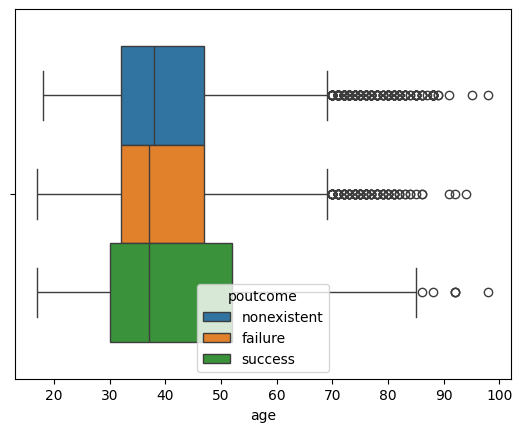

In [6]:
#main_df.info()
#main_df.head()
#main_df[main_df['y']=='yes'].describe()

sns.boxplot(data = main_df, x='age', hue = 'poutcome')

#main_df.groupby('previous')['poutcome'].value_counts(normalize=True)
#customers contavcted 2 to 4 timw previous 40 percent sucess

<Axes: xlabel='age', ylabel='Probability'>

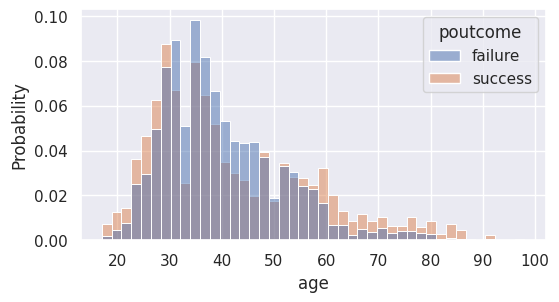

In [57]:
#how many people are yes or no in this data set
plt.figure(figsize=(6,3))
sns.histplot(data = main_df[main_df['poutcome']!='nonexistent'], x='age', hue = 'poutcome', 
             stat='probability', common_norm = False)

In [28]:
#main_df.groupby('education').value_counts()
#education degree has higher rate
#main_df['nr.employed'].describe()

#plt.scatter(data= main_df,y = 'age', x ='nr.employed')
#sns.boxplot(data = main_df, x='nr.employed', hue = 'poutcome')
#fit and transdorm code
categorical_columns = main_df.select_dtypes(include=['object']).columns.tolist()
for i in categorical_columns: 
    print(main_df[i].value_counts())
drop_col = ['month','day_of_week','poutcome','contact','age','duration']
drop_df= main_df.drop(columns=drop_col, inplace=False)
categorical_columns = drop_df.select_dtypes(include=['object']).columns.tolist()
encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(drop_df[categorical_columns])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

df_encoded = pd.concat([drop_df, one_hot_df], axis=1)
df_encoded.drop(columns=categorical_columns, inplace=True)


job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64
marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64
default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64
housing
yes        21576
no         18622
unknown      990
Name: count, dtype: int64
loan
no         33950
yes         6248
unknown      990
Name: count, dtype: int64
contact
cellular     26144
telephone    15044
Name: count, dtype: in

                               campaign     pdays  previous  emp.var.rate  \
campaign                       1.000000  0.052584 -0.079141      0.150754   
pdays                          0.052584  1.000000 -0.587514      0.271004   
previous                      -0.079141 -0.587514  1.000000     -0.420489   
emp.var.rate                   0.150754  0.271004 -0.420489      1.000000   
cons.price.idx                 0.127836  0.078889 -0.203130      0.775334   
cons.conf.idx                 -0.013733 -0.091342 -0.050936      0.196041   
euribor3m                      0.135133  0.296899 -0.454494      0.972245   
nr.employed                    0.144095  0.372605 -0.501333      0.906970   
job_admin.                     0.011745 -0.025398  0.018888     -0.024572   
job_blue-collar               -0.001775  0.065335 -0.054845      0.057264   
job_entrepreneur              -0.002203  0.019246 -0.013239      0.009363   
job_housemaid                  0.004226 -0.001649 -0.011569      0.036367   

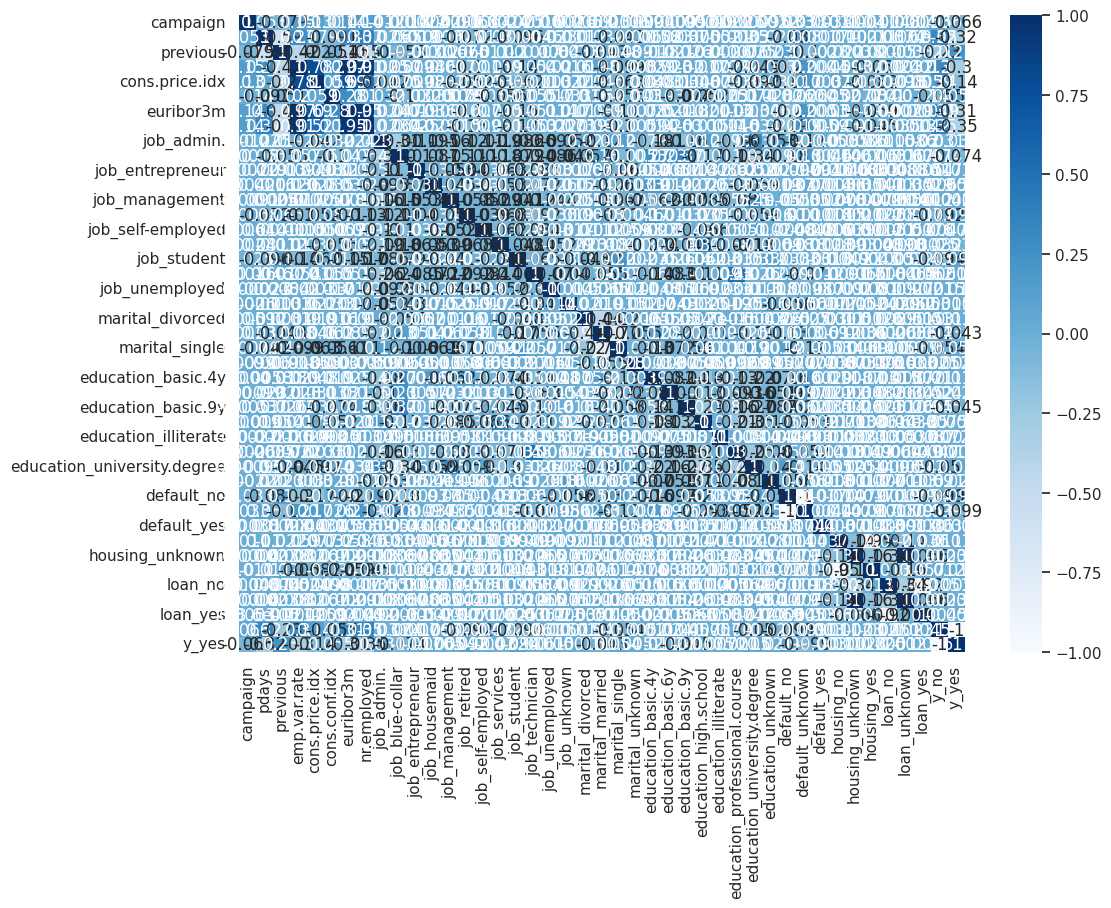

In [29]:
corr = df_encoded.corr()
sns.set_theme(rc={"figure.figsize":(11.7,8.27)})
sns.heatmap(data=corr, cmap="Blues",annot=True)
print(corr)
#above -+.2 keep

In [58]:
df_encoded.columns

Index(['campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'y_no', 'y_yes'],
      dtype='object')

In [ ]:
#testing to predict y
#include_these_featured = ['age','job','housing','loan','duration','campaign','nr.employed','cons.price.idx','emp.var.rate']





In [12]:
from sklearn.model_selection import train_test_split

In [30]:
X= main_df[categorical_columns]
y= main_df['y']


In [31]:
pd.get_dummies(X, drop_first=True)

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,education_professional.course,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,y_yes
0,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,True
41184,True,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
41185,False,False,False,False,True,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,False
41186,False,False,False,False,False,False,False,False,True,False,...,True,False,False,False,False,False,False,False,False,True


In [32]:
from sklearn.model_selection import train_test_split


In [33]:
X= main_df[drop_col]
y= main_df['y']

In [34]:
X_dummies = pd.get_dummies(X, drop_first=True)

In [41]:
#train_test_split
X_train, X_test, y_train,y_test = train_test_split(X_dummies,y, random_state=101)

In [42]:
y_test.shape

(10297,)

In [27]:
#build a model


In [51]:
logreg_model = LogisticRegression(max_iter=500)

logreg_model.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,500
,multi_class,'deprecated'


In [25]:
#evaluation 


In [54]:
train_preds = logreg_model.predict(X_train)
test_preds = logreg_model.predict(X_test)

In [55]:
len(train_preds[train_preds=='yes'])

1746

In [59]:
from sklearn.metrics import mean_squared_error

In [ ]:
#np.sqrt(mean_squared_error(y_true=y_test, y_pred=my_test_prediction))
#sns.scatterplot(x=y_test, y=my_test_prediction)

NameError: name 'my_test_prediction' is not defined